# Lab4 Introduction to Reinforcement Learning

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/rl.png?raw=1' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br> 
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [ ]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env as env

### Environment - Cliff Gridworld

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/grid.png?raw=1' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point.
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [ ]:
# Initialize environment
env = env.World()

In [ ]:
#print action ที่ agent เดินได้
env.available_actions()

['up', 'down', 'left', 'right']

### Define Random Agent

Define an agent that walk randomly.

In [ ]:
# Define Random Agent Object
class DumbAgent():
    def action(self, available_actions):
        return np.random.choice(available_actions) #random เลือกการเดิน

In [ ]:
# Test your code
agent = DumbAgent()
agent.action([1,2,3,4])

1

###  Define a Q-Agent (Q-learning)

Define an agent that used q-learning using the following pseudocode: </br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/q_learning.png?raw=1'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [ ]:
class Q_Agent():
    
    #initial Q-table เริ่มที่ 0 
    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}
                
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        
    def action(self, available_actions):
        #
        # Code here
        #
        if np.random.uniform(0,1) < self.epsilon:
            # Exploration พยายามหาเส้นทางอื่นที่ดีกว่าที่เคยเจอ
            return np.random.choice(available_actions)
        else:
            # Exploitation มุ่งไปในทางที่ดีสุดที่คิดว่าดีแล้ว
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values())
            # random if you have multiple max value สุ่มกรณีมีทางที่เป็น max value หลายทาง
            return np.random.choice([key for key, value in S.items() if value == max_value])
            
            
    def update(self, current_state, reward, next_state, actions):
        #
        # Code here
        #
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_Q_value = self.q_table[current_state][actions]
        
        # From the equation in pseudocode สมการในการอัพเดท value
        self.q_table[current_state][actions] = current_Q_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_Q_value)

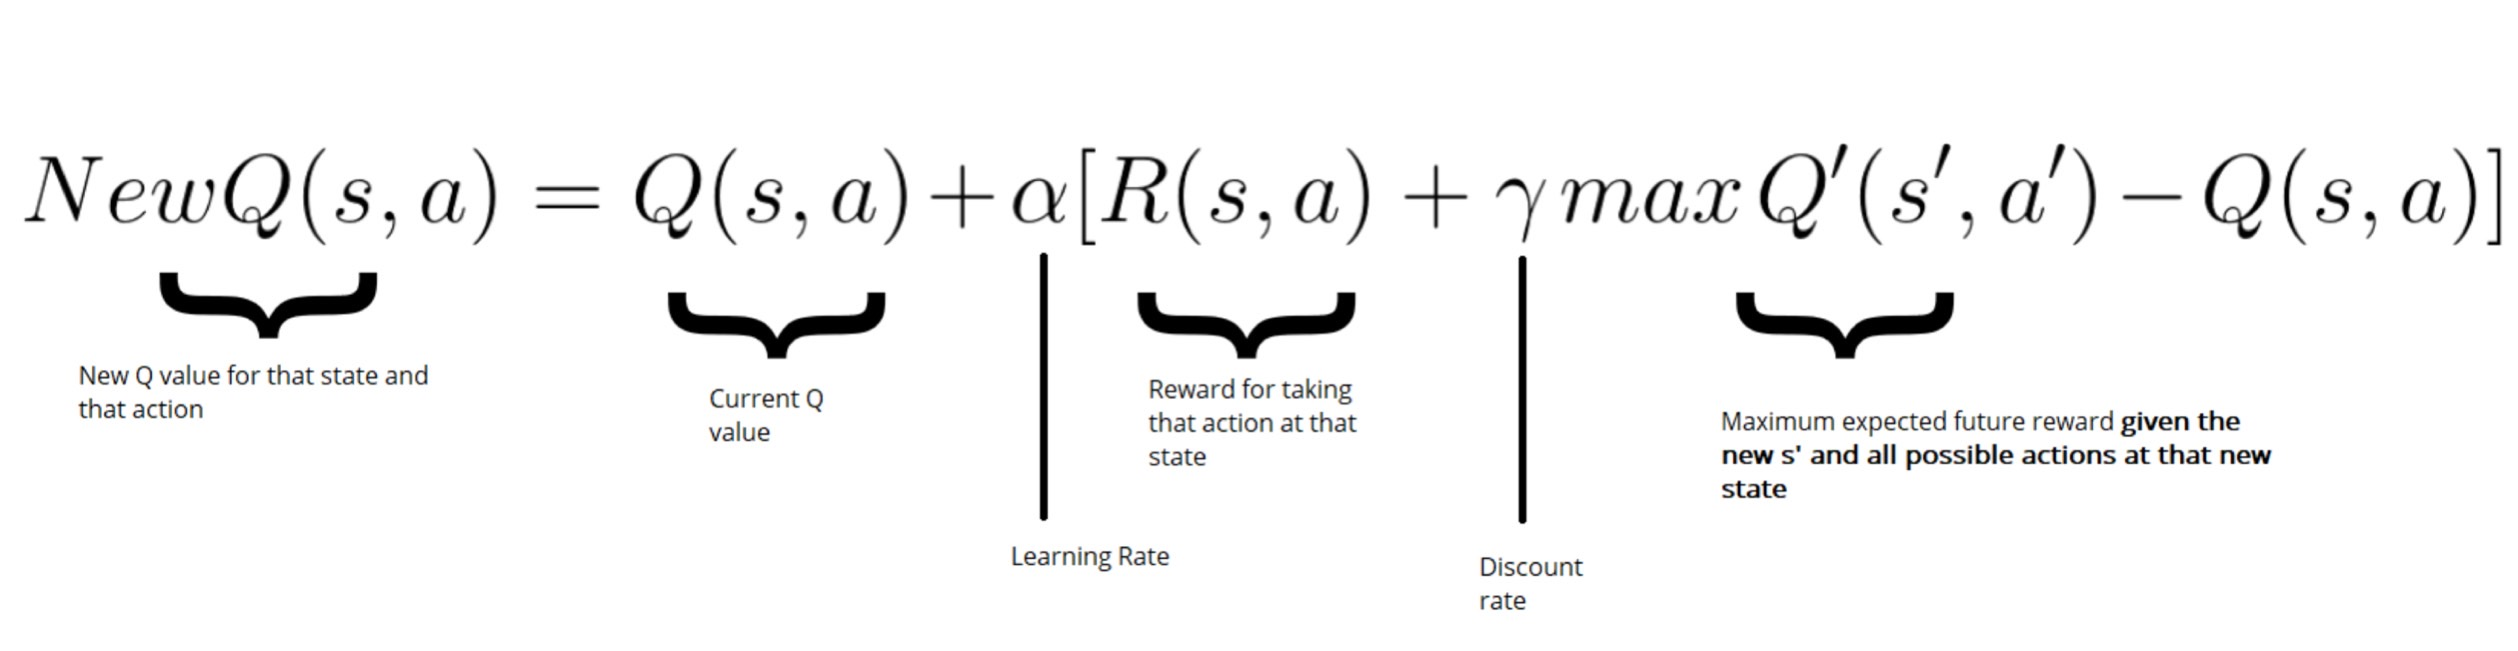

###  Deploy Your Agent

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>
For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn: 
    agent.update( ... )
```

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

In [ ]:
def run(env, agent, trials, max_steps_per_episode, learn=False): #learn=False ไม่ให้ agent ใช้ Q-table เรียนรู้ในการเดิน
    # max_steps_per_episode step : สูงสุดที่ใช้ในการเดินเพื่อให้เกมจบ     
    # trials : เดินได้ทั้งหมดกี่รอบ                                
    total_reward = []
    for trial in range(trials):
        
        sum_reward = 0
        step = 0
        game_over = False
        while step < max_steps_per_episode and not game_over:
            
            # Code here
            # Sent the action to environment and get the next state 
            # and reward
            current_state = env.current_location
            action = agent.action(env.actions)
            reward = env.move_agent(action)
            next_state = env.current_location
            
            if learn: # ถ้า set learn ให้เป็น true จะมีการอัพเดทค่าใน Q-table แล้วเอามาใช้ในการเดินต่อๆไป
                agent.update(current_state, reward, next_state, action)
            
            sum_reward += reward
            step += 1
            
            if env.end_state(): #เริ่มเกมใหม่ reset ใหม่ทั้งหมด
                env.reset()
                game_over = True
        
        total_reward.append(sum_reward)
    
    return total_reward

In [ ]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### Run a Dump Agent

In [ ]:
## Run
env.reset()
agent = DumbAgent()
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=False)

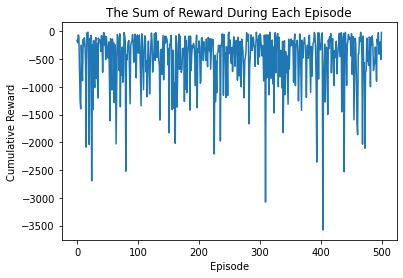

In [ ]:
## Plot reward
plot_total_reward(total_reward)

### Run an Q-Agent

In [ ]:
## Run จะมีการอัพเดทค่า Q-table ให้ agent ใช้ในการเดิน
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.5)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

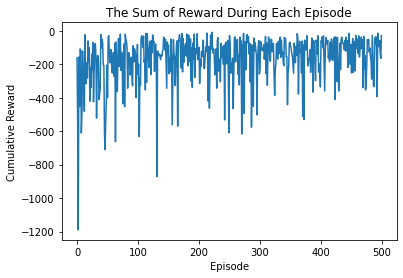

In [ ]:
## Plot reward
plot_total_reward(total_reward)
#มี policy บอกว่าควรเดินไปทางไหน จะได้ reward มากที่สุด

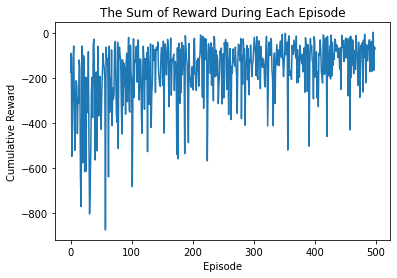

In [ ]:
## Run จะมีการอัพเดทค่า Q-table ให้ agent ใช้ในการเดิน
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=0.8, epsilon=0.2)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

## Plot reward
plot_total_reward(total_reward)
#มี policy บอกว่าควรเดินไปทางไหน จะได้ reward มากที่สุด

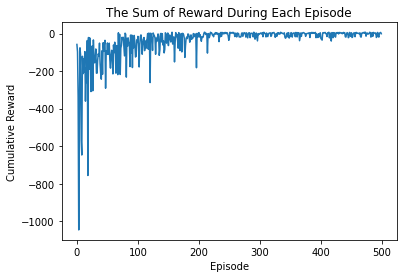

In [ ]:
## Run จะมีการอัพเดทค่า Q-table ให้ agent ใช้ในการเดิน
env.reset()
agent = Q_Agent(env, alpha=0.1, gamma=0.8, epsilon=0.2)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

## Plot reward
plot_total_reward(total_reward)
#มี policy บอกว่าควรเดินไปทางไหน จะได้ reward มากที่สุด

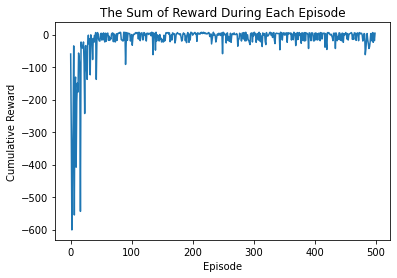

In [ ]:
## Run จะมีการอัพเดทค่า Q-table ให้ agent ใช้ในการเดิน
env.reset()
agent = Q_Agent(env, alpha=0.5, gamma=0.8, epsilon=0.2)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

## Plot reward
plot_total_reward(total_reward)
#มี policy บอกว่าควรเดินไปทางไหน จะได้ reward มากที่สุด

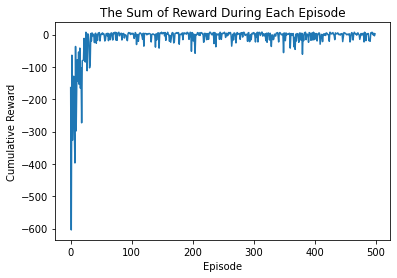

In [ ]:
## Run จะมีการอัพเดทค่า Q-table ให้ agent ใช้ในการเดิน
env.reset()
agent = Q_Agent(env, alpha=0.9, gamma=0.8, epsilon=0.2)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

## Plot reward
plot_total_reward(total_reward)
#มี policy บอกว่าควรเดินไปทางไหน จะได้ reward มากที่สุด

alpha ควรมีค่าอยุ่ในช่วง (0,1) มันคือ Learning rate เป็นเหมือน step ในการเดิน ยิ่งกำหนดให้มีค่ามากก็จะยิ่งทำให้ค่า weight และค่า loss ของโมเดลเปลี่ยนแปลงครั้งละมากๆ แต่ก็จะช่วยให้โมเดลจะทำงานได้ไวขึ้นในการตามหาค่า weight ที่ทำให้ได้ loss ต่ำๆ ส่วนค่า gamma  ควรปรับให้อยู่ระหว่าง 0.8-0.99

### Show Q-Table

Show the agent's Q-table using to make a decision.

In [ ]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [ ]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-4.636699012949167
	down
		-4.611306255486271
	left
		-4.62376484478048
	right
		-4.438783686609059
(0, 1)
	up
		-4.532051791028446
	down
		-4.2963125582234145
	left
		-4.623947609612082
	right
		-4.549995511700016
(0, 2)
	up
		-4.509110516474873
	down
		-4.120390697783034
	left
		-4.437060229611313
	right
		-4.596483154715388
(0, 3)
	up
		-4.548048880420218
	down
		-4.504804264799075
	left
		-4.317180209814222
	right
		-22.134550464
(0, 4)
	up
		-18.0
	down
		-22.0963816161792
	left
		-4.336342634573035
	right
		-18.0
(0, 5)
	up
		-18.0
	down
		-18.0
	left
		-18.648
	right
		-18.0
(0, 6)
	up
		0
	down
		-18.0
	left
		-18.0
	right
		-18.0
(0, 7)
	up
		-18.0
	down
		-18.0
	left
		-18.0
	right
		-18.648
(0, 8)
	up
		-18.0
	down
		-18.0
	left
		-18.0
	right
		-2.7765727200000008
(0, 9)
	up
		-3.780933247589761
	down
		-3.770101603432801
	left
		-21.959838144
	right
		-3.8430445802457602
(1, 0)
	up
		-4.568650719091196
	down
		-4.322513723050158
	left
		-4.622229591928772
	rig